In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
data = yf.download("SOL-USD", start="2021-03-11", end="2022-03-11")#Download data from yahoo finance for Solana Coin

[*********************100%***********************]  1 of 1 completed


In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-11,14.219837,16.239399,13.704226,15.992279,15.992279,229272516
2021-03-12,16.020920,16.485796,14.111229,14.552142,14.552142,185287457
2021-03-13,14.563803,15.394398,13.920056,15.308803,15.308803,145102757
2021-03-14,15.301581,15.349832,14.378764,14.508266,14.508266,90232804
2021-03-15,14.477127,14.790473,13.698057,14.186662,14.186662,102600692


In [22]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-07,84.552872,86.483086,80.316849,82.130066,82.130066,2375648176
2022-03-08,82.112602,84.779900,81.540115,82.254761,82.254761,2112765959
2022-03-09,82.279922,89.482048,82.206238,88.202065,88.202065,2624860794
2022-03-10,88.190399,88.453949,81.019341,82.939087,82.939087,2196400279
2022-03-11,82.940742,84.050667,80.281235,80.744995,80.744995,1852734626


In [23]:
data['Adj Close'].head()

Date
2021-03-11    15.992279
2021-03-12    14.552142
2021-03-13    15.308803
2021-03-14    14.508266
2021-03-15    14.186662
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

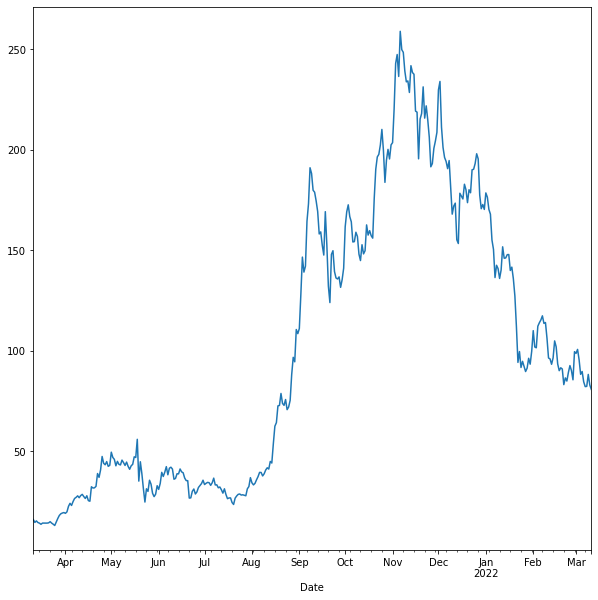

In [24]:
data['Adj Close'].plot(figsize=(10, 10), subplots=True)#Shows price movement for the last year

In [25]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.09005201227017279,
 0.0519965001700305,
 -0.05229253889890779,
 -0.02216699905738637,
 -0.039747796974588176]

In [26]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.09436783744557643,
 0.05068978747541236,
 -0.05370940968576811,
 -0.022416379210130243,
 -0.04055931753807059]

In [27]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.63884277 and its annulized volatility is 1.42868488


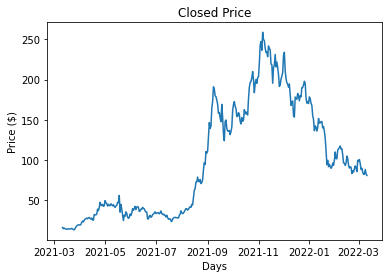

In [28]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

In [29]:
import os

In [30]:
S0 = 81.07              # spot assest price as at 19:27 11/03/2022
K = 105.0               # strike
T = 1.0                 # maturity 
r = 0.0114                 # risk free rate 
sig = 1.43               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [31]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u        

In [32]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [33]:
S

array([[ 81.07      , 185.10511704, 422.64591532, 965.016919  ],
       [  0.        ,  35.50601412,  81.07      , 185.10511704],
       [  0.        ,   0.        ,  15.55047538,  35.50601412],
       [  0.        ,   0.        ,   0.        ,   6.8106007 ]])

In [34]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.30663711913500735

In [35]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 69.49398588],
       [ 0.        ,  0.        ,  0.        , 98.1893993 ]])

In [36]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[62.7443162 , 33.15642972,  0.        ,  0.        ],
       [ 0.        , 76.17397406, 48.00179641,  0.        ],
       [ 0.        ,  0.        , 89.05128176, 69.49398588],
       [ 0.        ,  0.        ,  0.        , 98.1893993 ]])

In [37]:
print('European ' + payoff, str( V[0,0]))

European put 62.74431619990356


In [38]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V


array([[62.93432273, 33.15642972,  0.        ,  0.        ],
       [ 0.        , 76.44905358, 48.00179641,  0.        ],
       [ 0.        ,  0.        , 89.44952462, 69.49398588],
       [ 0.        ,  0.        ,  0.        , 98.1893993 ]])

In [39]:
print('American ' + payoff, str( V[0,0]))

American put 62.93432273372345


In [40]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [41]:
T = 1/52
r = 0.0114
sigma = 1.43 
S0 = 81.07
K = 105.0

In [42]:
S = mcs_simulation_np(1000)

In [43]:
S = np.transpose(S)
S

array([[ 81.07      ,  81.8045378 ,  81.97979171, ...,  96.42626845,
         96.52404278,  96.58654238],
       [ 81.07      ,  80.88059864,  80.41443404, ...,  94.33486066,
         94.63524756,  94.16850975],
       [ 81.07      ,  81.13731657,  81.22331348, ..., 132.32442039,
        133.32794487, 133.95012859],
       ...,
       [ 81.07      ,  80.78306321,  80.32167248, ...,  80.05525577,
         79.90725539,  79.60897386],
       [ 81.07      ,  80.25435571,  79.67800752, ...,  79.36499035,
         80.10539527,  80.03322699],
       [ 81.07      ,  81.06107869,  81.23623083, ...,  66.62471909,
         66.6349812 ,  66.15482311]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

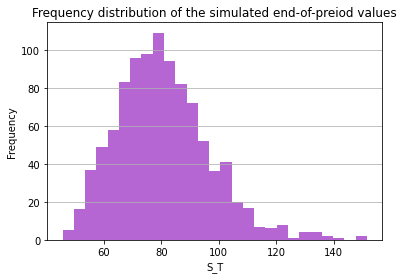

In [44]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#b666d2',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [45]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 25.249087225954906


In [46]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.8374150864605828
